#About Dataset

Customer Personality Analysis involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

By conducting a Customer Personality Analysis, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.


**Details of Features are as below:**

Id: Unique identifier for each individual in the dataset.

Year_Birth: The birth year of the individual.

Education: The highest level of education attained by the individual.

Marital_Status: The marital status of the individual.

Income: The annual income of the individual.

Kidhome: The number of young children in the household.

Teenhome: The number of teenagers in the household.

Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.

Recency: The number of days since the last purchase or interaction.

MntWines: The amount spent on wines.

MntFruits: The amount spent on fruits.

MntMeatProducts: The amount spent on meat products.

MntFishProducts: The amount spent on fish products.

MntSweetProducts: The amount spent on sweet products.

MntGoldProds: The amount spent on gold products.

NumDealsPurchases: The number of purchases made with a discount or as part of a deal.

NumWebPurchases: The number of purchases made through the company's website.

NumCatalogPurchases: The number of purchases made through catalogs.

NumStorePurchases: The number of purchases made in physical stores.

NumWebVisitsMonth: The number of visits to the company's website in a month.

AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.

AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.

AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.

AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.

AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.

Complain: Binary indicator (1 or 0) whether the individual has made a complaint.

Z_CostContact: A constant cost associated with contacting a customer.

Z_Revenue: A constant revenue associated with a successful campaign response.

Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as  plt

LOAD THE DATASET

In [4]:
data = pd.read_csv("/content/customer_seg.csv")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

CHECK FOR NULL VALUES

In [6]:
print(data.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
#FILL THE NULL VALUES WITH MEDIAN
data['Income'].fillna(data['Income'].median(), inplace=True)
data.isnull().sum()

<ipython-input-7-fca7136e426c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


CREATING NEW FEATURES

In [8]:
data['Total_Spend'] = (
    data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
    data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
)


data['Average_Spend']= data['Total_Spend']/(data['NumDealsPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']
+data['NumStorePurchases']+ 1e-9)

data['Age']= datetime.datetime.now().year- data['Year_Birth']

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['Customer_Relation']= datetime.datetime.now() - data['Dt_Customer']
data['Customer_Relation'] = data['Customer_Relation'].dt.days

data['Total_Children']= data['Kidhome']+data['Teenhome']


data['Engagement_Score']=(data['NumWebVisitsMonth']+data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']-data['Complain'])

data['Income_per_Capita']=data['Income']/(2+data['Total_Children'])

data['Campaign_Acceptance_Rate']= (data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5'])/5


In [9]:
cols = ['ID', 'Year_Birth','Recency', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue']
data.drop(cols, axis = 1, inplace = True )


ADDING LABELS TO CATEGORICAL VALUES

In [10]:
le= LabelEncoder()
data['Education']= le.fit_transform(data['Education'])
data['Marital_Status']= le.fit_transform(data['Marital_Status'])


In [11]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Total_Spend,Average_Spend,Age,Customer_Relation,Total_Children,Engagement_Score,Income_per_Capita,Campaign_Acceptance_Rate
0,2,4,58138.0,0,0,2012-09-04,635,88,546,172,...,0,1,1617,64.680000,68,4531,0,7,29069.000000,0.0
1,2,4,46344.0,1,1,2014-03-08,11,1,6,2,...,0,0,27,4.500000,71,3981,2,5,11586.000000,0.0
2,2,5,71613.0,0,0,2013-08-21,426,49,127,111,...,0,0,776,36.952381,60,4180,0,4,35806.500000,0.0
3,2,5,26646.0,1,0,2014-02-10,11,4,20,10,...,0,0,53,6.625000,41,4007,1,6,8882.000000,0.0
4,4,3,58293.0,1,0,2014-01-19,173,43,118,46,...,0,0,422,22.210526,44,4029,1,5,19431.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,2013-06-13,709,43,182,42,...,0,0,1341,74.500000,58,4249,1,5,20407.666667,0.0
2236,4,5,64014.0,2,1,2014-06-10,406,0,30,0,...,0,0,444,20.181818,79,3887,3,8,12802.800000,0.2
2237,2,2,56981.0,0,0,2014-01-25,908,48,217,32,...,0,0,1241,65.315789,44,4023,0,7,28490.500000,0.2
2238,3,5,69245.0,0,1,2014-01-24,428,30,214,80,...,0,0,843,36.652174,69,4024,1,3,23081.666667,0.0


In [12]:
data.isnull().sum()

,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


PLOTTING  THE HEATMAP

<Axes: >

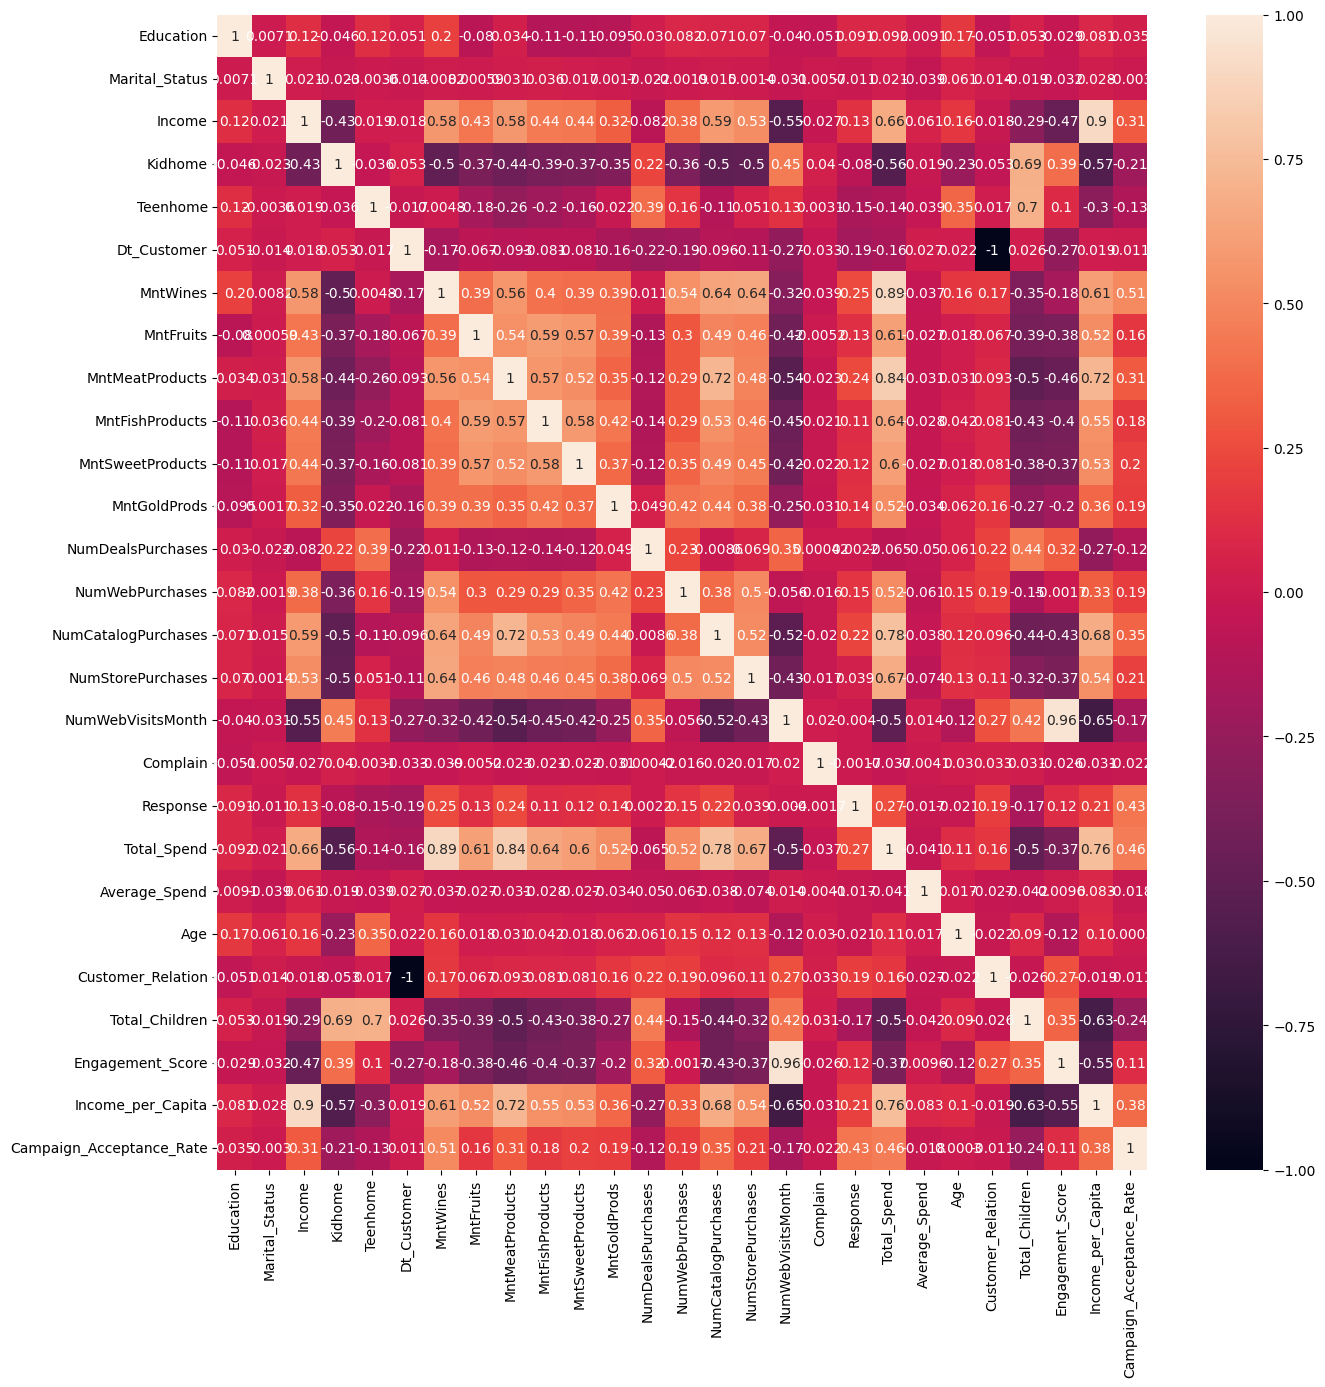

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

sns.heatmap(data.corr(), annot=True)

PLOTTING HIERARCHICAL CLUSTERING TO UNDERSTAND THE CORRELATION BETWEEN FEATURES

In [15]:
X = pd.DataFrame(data)

numeric_columns = data.select_dtypes(include=[np.number]).columns

# Initialize StandardScaler
sc = StandardScaler()

# Scale the entire numeric data
X = sc.fit_transform(data[numeric_columns])

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


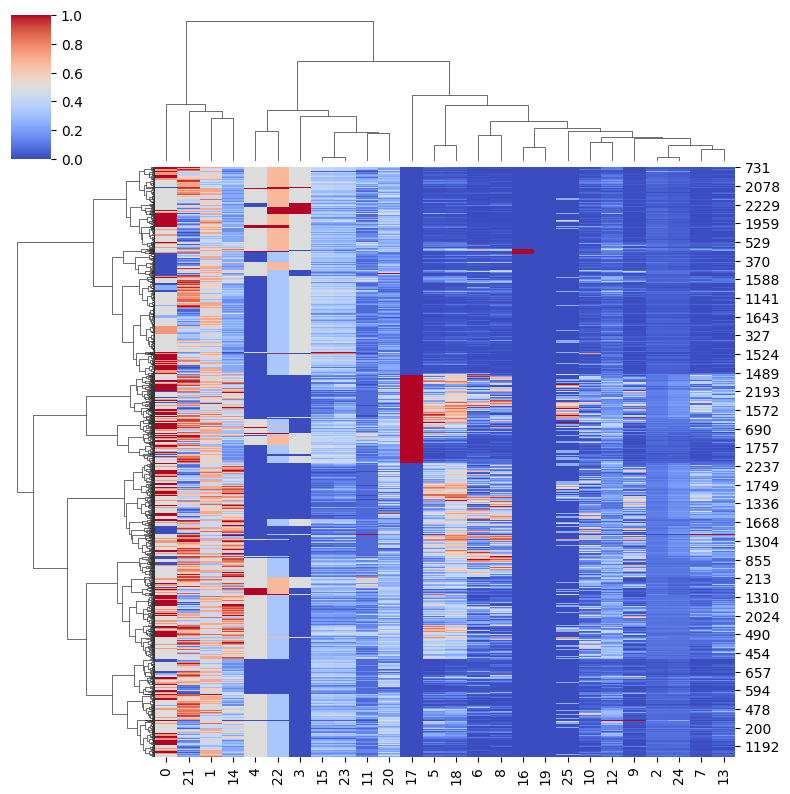

In [16]:
sns.clustermap(data=X, cmap='coolwarm', figsize=(8,8), standard_scale=1, metric='euclidean', method='ward')

JUST FINDING NUMBER OF FEATURES FOR MAX VARIANCE

In [17]:
data = pd.DataFrame(data)

numeric_columns = data.select_dtypes(include=[np.number]).columns

# Initialize StandardScaler
sc = StandardScaler()

# Scale the entire numeric data
scaled_data = sc.fit_transform(data[numeric_columns])


# Now apply PCA
# Initialize PCA without specifying components
pca = PCA(n_components=None)

# Fit the PCA model to the data
pca.fit(scaled_data)

# Now you can access explained_variance_ratio_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.99) + 1  # Find where 99% variance is reached

# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)

print(f"Selected {n_components} components out of {scaled_data.shape[1]}")


Selected 21 components out of 26


FINDING BEST K VALUE BY ELBOW METHOD( uses WCSS)

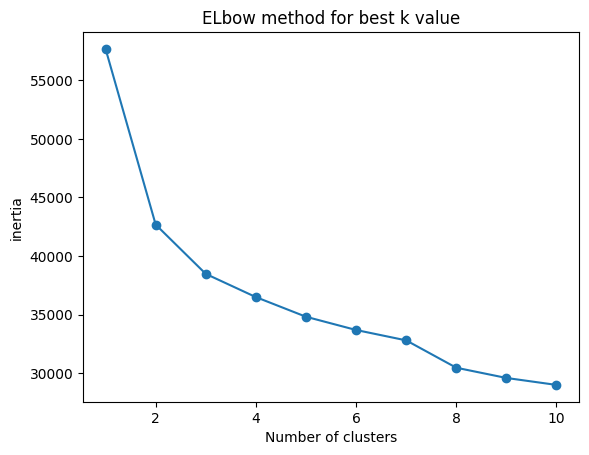

In [18]:
# Calculate inertia for different values of k (clusters)
inertia=[]

for k in range(1, 11):
  kmeans= KMeans(n_clusters=k, random_state=42)
  kmeans.fit(reduced_data)
  inertia.append(kmeans.inertia_)

# Plot inertia to visualize the elbow
plt.plot(range(1,11), inertia, marker='o')
plt.title('ELbow method for best k value')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

PLOTTING CLUSTERS ALONG WITH SILHOUETTE SCORE

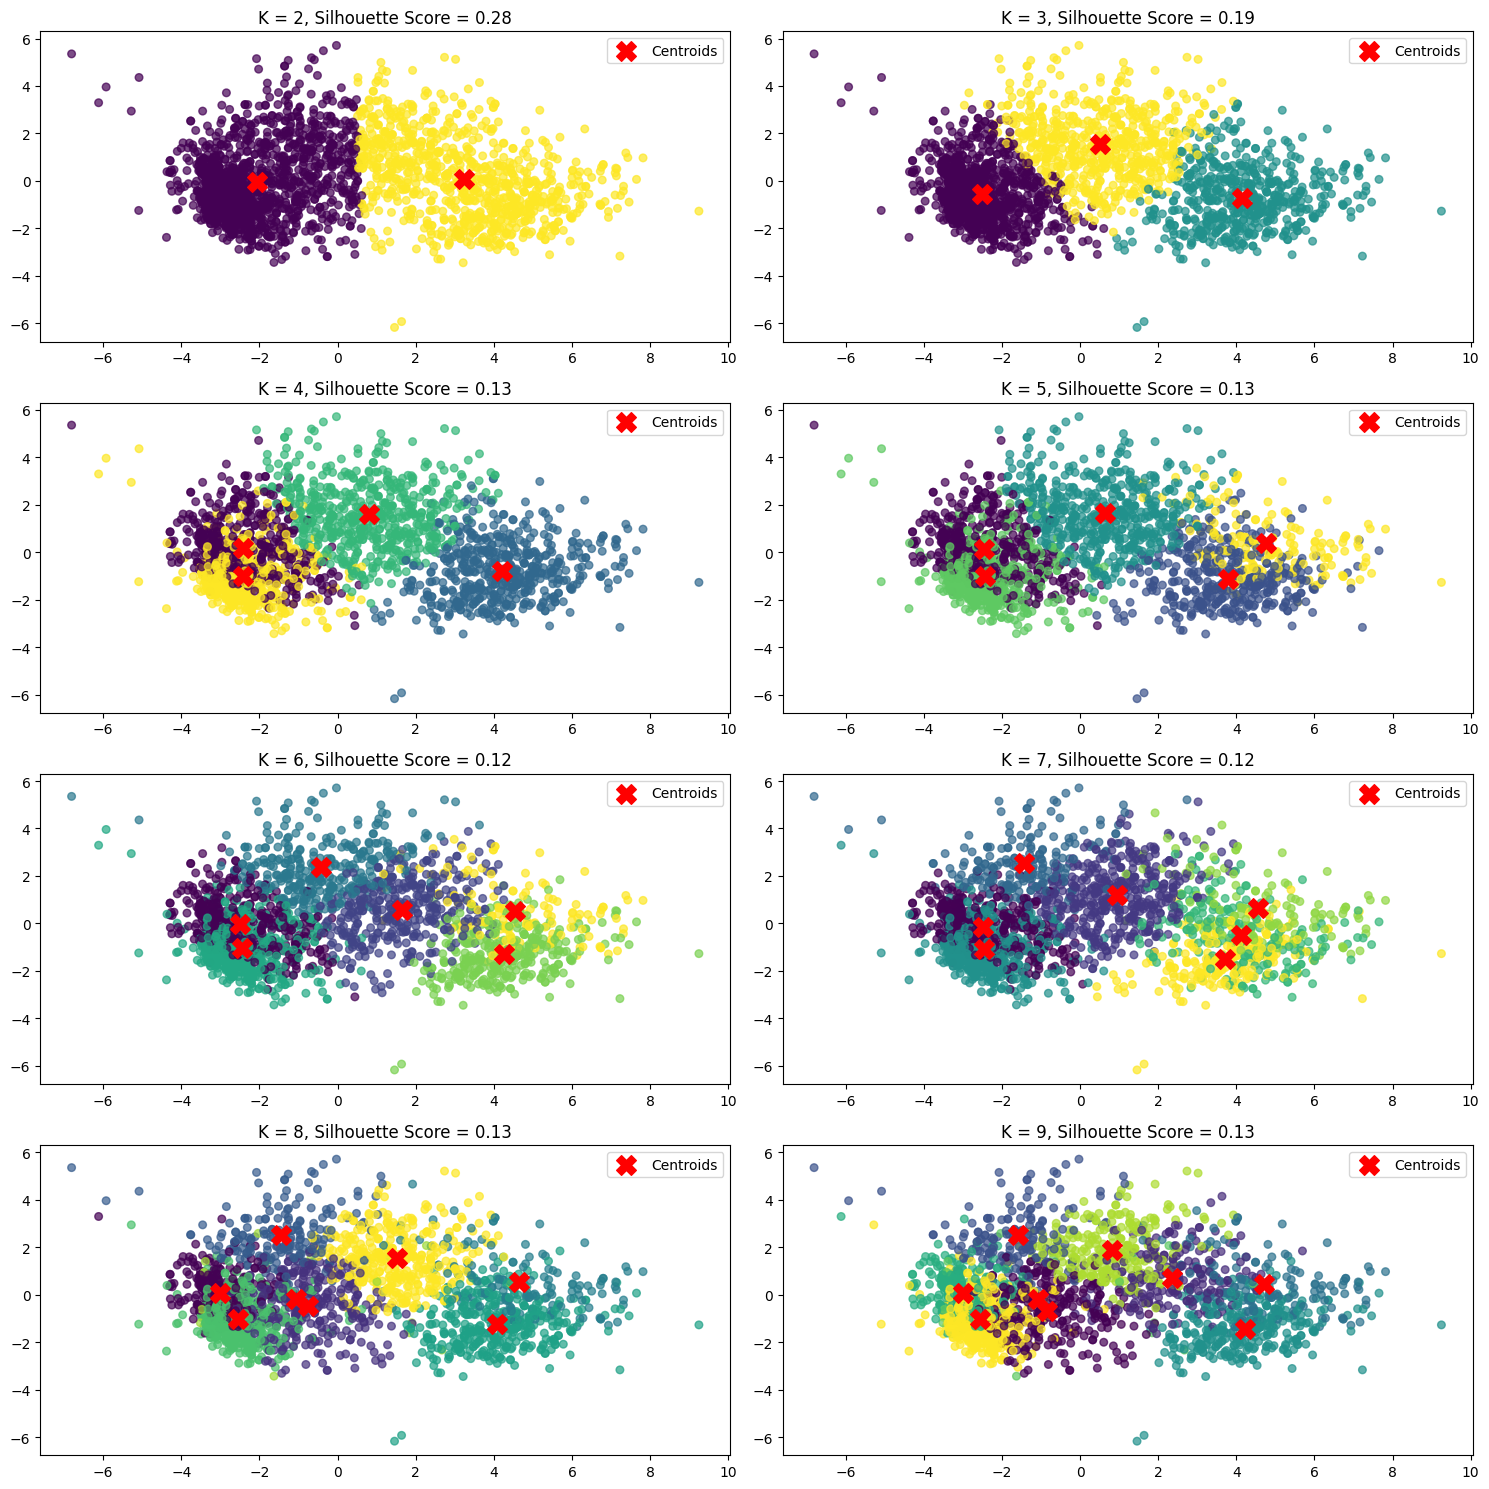

In [19]:
# Create a subplot grid (3 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()

# Loop through values of k from 2 to 10
for i, k in enumerate(range(2, 10)):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(reduced_data)  # Use the reduced data (after PCA)

    # Calculate silhouette score
    s = silhouette_score(reduced_data, y_pred)

    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(reduced_data)  # Reduce data to 2D

    # Plot the clusters
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=30, alpha=0.7)

    # Plot the centroids
    centroids = kmeans.cluster_centers_
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

    # Set title and legend
    axes[i].set_title(f'K = {k}, Silhouette Score = {s:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [20]:
# Check variance captured by the first 2 components
pca = PCA(n_components=2)
pca.fit(reduced_data)

variance_explained_by_2_components = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by 2 components: {variance_explained_by_2_components:.2f}")


Variance explained by 2 components: 0.43


**we can capture 99% - 100%  with 20 or 21 features but for visualization we use 2 components(only 2 top  features having variance of 43%).**